In [1]:
from flask import Blueprint
import numpy as np
import pandas as pd
import pickle
import copy
from sklearn.preprocessing import MinMaxScaler
import requests
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from pandas import Series
from numpy import nan
import copy
import math

In [9]:
from glob import glob
import os
import pandas as pd
# from flask import jsonify/

path = os.getcwd()
csv_list = sorted(glob(os.path.join(path,"DB","*.csv")))

data = pd.read_csv(csv_list[0])
data.iloc[0,0]

5.1

In [47]:
import tensorflow as tf
from tensorflow import keras
#params
input_shape = 3
output_shape = 1

act_function = 'relu'

num_perceptron_layer1 = 2
num_perceptron_layer2 = 4
num_perceptron_layer3 = 8
num_perceptron_layer4 = 4
num_perceptron_layer5 = 2
num_perceptron_out = output_shape

num_perceptron_list = [
    num_perceptron_layer1,
    num_perceptron_layer2,
    num_perceptron_layer3,
    num_perceptron_layer4,
    num_perceptron_layer5,
    num_perceptron_out,
    ]

# layer_list = []
inputs = tf.keras.Input(shape=input_shape)
for i in range(len(num_perceptron_list)):
    n_percep = num_perceptron_list[i]
    if i == 0:
        x = keras.layers.Dense(n_percep, activation= act_function)(inputs)

    elif  i != 0 and n_percep != 0:
        x = keras.layers.Dense(n_percep)(x)

    else: pass

dense_model = tf.keras.Model(name="model_1",inputs=inputs, outputs=x)
# temp_input = tf.constant([[1,2,3],[1,2,3],[1,2,3],])
# dense_model(temp_input)
dense_model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_137 (Dense)            (None, 2)                 8         
_________________________________________________________________
dense_138 (Dense)            (None, 4)                 12        
_________________________________________________________________
dense_139 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_140 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_141 (Dense)            (None, 2)                 10        
_________________________________________________________________
dense_142 (Dense)            (None, 1)                 3   

In [42]:
dense_model.variables

[<tf.Variable 'dense_113/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[-0.46001488],
        [-0.4574774 ],
        [ 1.1617204 ]], dtype=float32)>,
 <tf.Variable 'dense_113/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [34]:
layer_list = []

for i in range(len(num_perceptron_list)):
    n_percep = num_perceptron_list[i]
    if n_percep != 0 :
        _ = keras.layers.Dense(n_percep)
        layer_list.append(_)
    else: pass


inputs = tf.keras.Input(2)
x = layer_list[0](inputs)
x = layer_list[4](x)

dense_model = tf.keras.Model(inputs=inputs, outputs=x)
temp_input = tf.constant([[1,2],[1,2],[1,2],[1,2]])
dense_model(temp_input)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0.05494921, 0.3434004 ],
       [0.05494921, 0.3434004 ],
       [0.05494921, 0.3434004 ],
       [0.05494921, 0.3434004 ]], dtype=float32)>

In [2]:
start = datetime.datetime(2016,1,1)
end = datetime.datetime(2022,2,24)

In [3]:
# https://finance.yahoo.com/quote/FB?p=FB&.tsrc=fin-srch 종목코드 참고
df = web.DataReader('^GSPC','yahoo',start,end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,2062.540039,2043.619995,2060.590088,2043.939941,2655330000,2043.939941
2016-01-04,2038.199951,1989.680054,2038.199951,2012.660034,4304880000,2012.660034
2016-01-05,2021.939941,2004.170044,2013.780029,2016.709961,3706620000,2016.709961
2016-01-06,2011.709961,1979.050049,2011.709961,1990.260010,4336660000,1990.260010
2016-01-07,1985.319946,1938.829956,1985.319946,1943.089966,5076590000,1943.089966
...,...,...,...,...,...,...
2022-02-17,4456.060059,4373.810059,4456.060059,4380.259766,3596510000,4380.259766
2022-02-18,4394.600098,4327.220215,4384.569824,4348.870117,3871340000,4348.870117
2022-02-22,4362.120117,4267.109863,4332.740234,4304.759766,4007780000,4304.759766


In [4]:
# economic_list = ['KOSPI200.KS','^GSPC','^N225',
# 'YM=F','ES=F','NQ=F','RTY=F','CL=F','GC=F',
# 'EURUSD=X','JPY=X',
# 'BTC-USD','NDAQ']

x_list_code = ['^GSPC','^N225',
'YM=F','ES=F','NQ=F','RTY=F','CL=F','GC=F',
'EURUSD=X','JPY=X',
'NDAQ']
y_code = "BTC-USD"

In [16]:
x_list = []
for i in x_list_code:
    print(i)
    df = web.DataReader(i,'yahoo',start,end)
    x_list.append(df)
y = web.DataReader(y_code,'yahoo',start,end)

^GSPC
^N225
YM=F
ES=F
NQ=F
RTY=F
CL=F
GC=F
EURUSD=X
JPY=X
NDAQ


<AxesSubplot:title={'center':'BTC'}, xlabel='Date'>

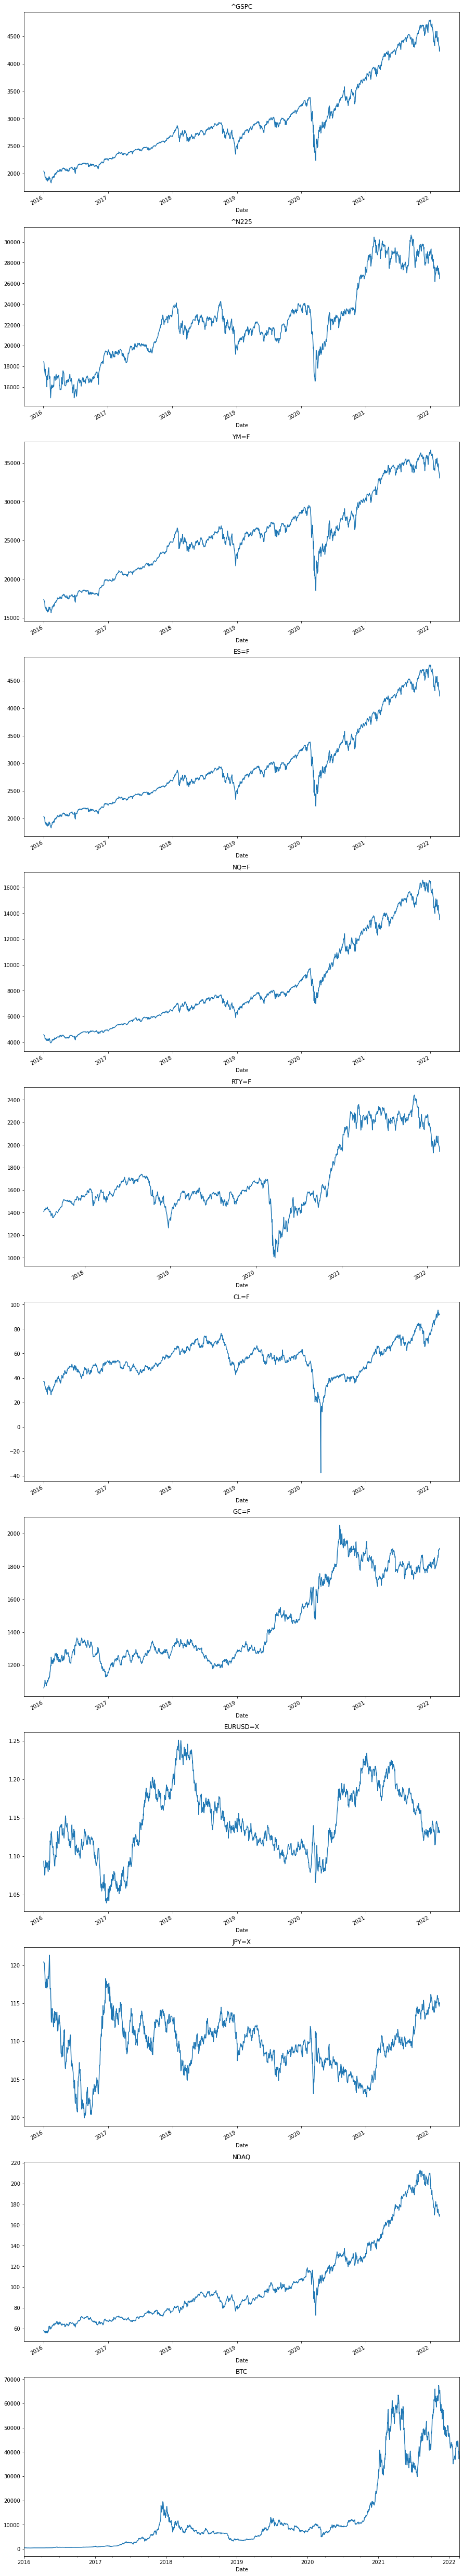

In [17]:
# fig, axes = plt.subplots(12,1, figsize=(15,120))
# plt.subplot(2, 1, 1)  
# x_list[0]['Close'].plot()
# plt.subplot(2, 1, 2) 
# x_list[1]['Close'].plot()


for i,val in enumerate(x_list):
    a=plt.subplot(len(x_list)+1,1,i+1)
    a.set_title(x_list_code[i])
    val["Close"].plot(figsize=(15,100))
a=plt.subplot(len(x_list)+1,1,len(x_list)+1)
a.set_title('BTC')
y["Close"].plot(figsize=(15,100))
    



In [21]:
def difference(dataset, interval=1):
	temp = copy.deepcopy(dataset)

	#dataset[i][j]
	for j in range(len(dataset[0])):
		for i in range(interval, len(dataset)):
			if math.isnan(dataset[i-interval][j]):
				t = interval
				while math.isnan(dataset[i-t][j]) and i>=t:
					t += 1
				value = dataset[i][j] - dataset[i-t][j]
				temp[i][j] = value
				
			else:
				value = dataset[i][j] - dataset[i-interval][j]
				temp[i][j] = value
				
				
	return temp


params = ['Volume', 'Close']
x_data_sub1 = pd.concat(x_list,axis=1)['Close']
x_data_sub1 = pd.concat([x_data_sub1,y[params]],axis=1)
x_data_sub1.columns = x_list_code + y[params].columns.to_list()

diff = difference(x_data_sub1.values)
x_data_sub1.iloc[:,:] = diff
data = x_data_sub1.iloc[1:,:]

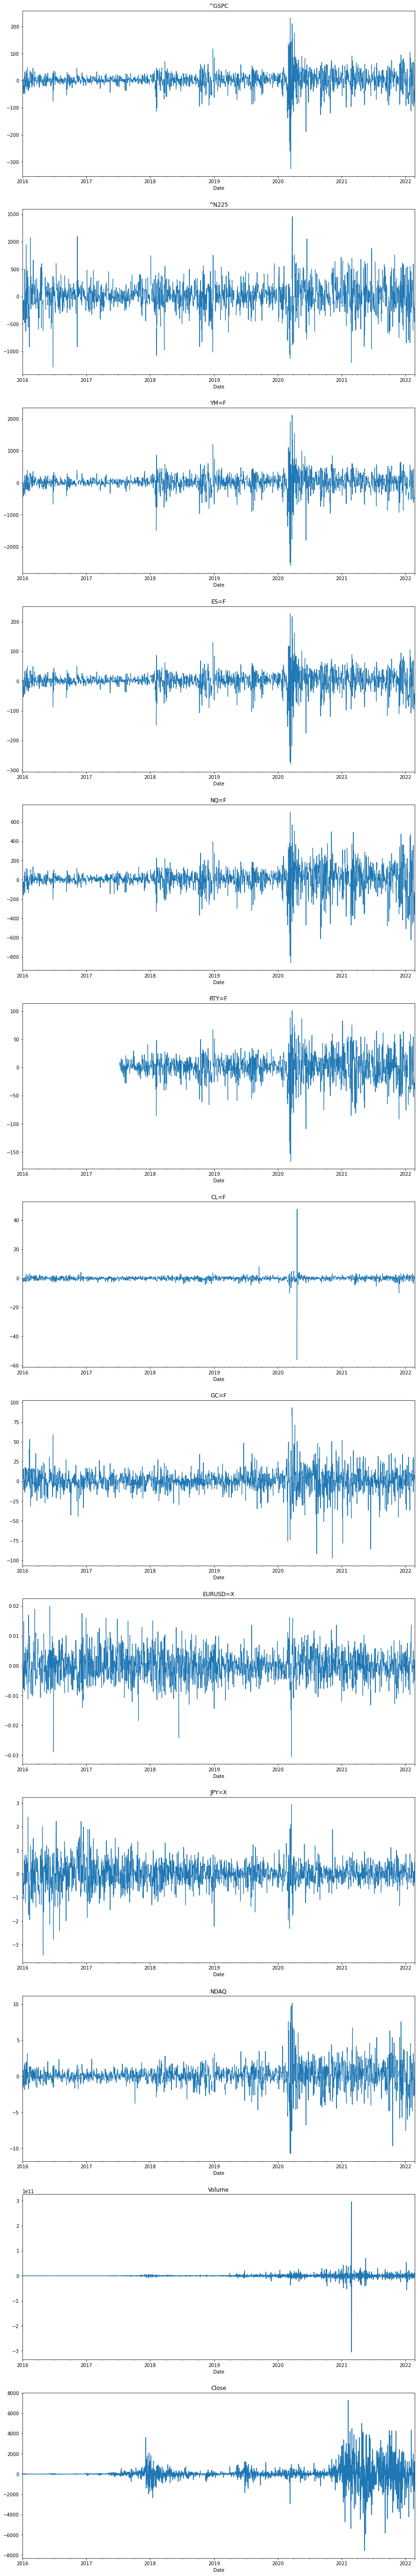

In [22]:
for i,val in enumerate(data.columns):
    a=plt.subplot(len(data.columns),1,i+1)
    a.set_title(val)
    data[val].plot(figsize=(15,100))


In [23]:
data

,^GSPC,^N225,YM=F,ES=F,NQ=F,RTY=F,CL=F,GC=F,EURUSD=X,JPY=X,NDAQ,Volume,Close
Date,,,,,,,,,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007492,-0.161995,NaN,-9.717700e+06,3.767029
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.182300e+06,-0.896027
2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.537200e+06,-3.427002
2016-01-04,-31.279907,NaN,-256.0,-26.50,-83.25,NaN,-0.280003,14.799927,-0.000507,0.022995,-1.629997,-1.156300e+06,3.080017
2016-01-05,4.049927,-76.980469,-4.0,2.75,-20.75,NaN,-0.789997,3.300049,-0.002644,-0.843994,0.860001,-3.954900e+06,-1.131012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.604019e+09,-1690.777344
2022-02-21,NaN,-211.201172,NaN,NaN,NaN,NaN,NaN,NaN,-0.004927,0.095001,NaN,1.093983e+10,-1356.097656
2022-02-22,-44.110352,-461.259766,-482.0,-43.50,-133.25,-27.400024,1.279999,7.500000,-0.000755,-0.351997,-2.569992,-3.787252e+09,1210.746094


In [24]:
test1 = data.loc[:,'Close'].map(lambda x: 1 if (x>=0) else 0)
test2 = test1.shift(periods=-1)
full_dataset = pd.concat([data,test2],axis=1)
full_dataset.columns = data.columns.to_list() + ['target']
full_dataset.fillna(0,inplace=True)
full_dataset

,^GSPC,^N225,YM=F,ES=F,NQ=F,RTY=F,CL=F,GC=F,EURUSD=X,JPY=X,NDAQ,Volume,Close,target
Date,,,,,,,,,,,,,,
2016-01-01,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,-0.007492,-0.161995,0.000000,-9.717700e+06,3.767029,0.0
2016-01-02,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.182300e+06,-0.896027,0.0
2016-01-03,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.537200e+06,-3.427002,1.0
2016-01-04,-31.279907,0.000000,-256.0,-26.50,-83.25,0.000000,-0.280003,14.799927,-0.000507,0.022995,-1.629997,-1.156300e+06,3.080017,0.0
2016-01-05,4.049927,-76.980469,-4.0,2.75,-20.75,0.000000,-0.789997,3.300049,-0.002644,-0.843994,0.860001,-3.954900e+06,-1.131012,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-20,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.604019e+09,-1690.777344,0.0
2022-02-21,0.000000,-211.201172,0.0,0.00,0.00,0.000000,0.000000,0.000000,-0.004927,0.095001,0.000000,1.093983e+10,-1356.097656,1.0
2022-02-22,-44.110352,-461.259766,-482.0,-43.50,-133.25,-27.400024,1.279999,7.500000,-0.000755,-0.351997,-2.569992,-3.787252e+09,1210.746094,0.0


* 테스트

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from hyperopt import fmin, tpe, hp, Trials, space_eval, STATUS_OK
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [51]:
trainset, testset = train_test_split(full_dataset,test_size=0.1,shuffle=False)

In [52]:
trainset.head()

,^GSPC,^N225,YM=F,ES=F,NQ=F,RTY=F,CL=F,GC=F,EURUSD=X,JPY=X,NDAQ,Volume,Close,target
Date,,,,,,,,,,,,,,
2016-01-01,0.000000,0.000000,0.0,0.00,0.00,0.0,0.000000,0.000000,-0.007492,-0.161995,0.000000,-9717700.0,3.767029,0.0
2016-01-02,0.000000,0.000000,0.0,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-6182300.0,-0.896027,0.0
2016-01-03,0.000000,0.000000,0.0,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,9537200.0,-3.427002,1.0
2016-01-04,-31.279907,0.000000,-256.0,-26.50,-83.25,0.0,-0.280003,14.799927,-0.000507,0.022995,-1.629997,-1156300.0,3.080017,0.0
2016-01-05,4.049927,-76.980469,-4.0,2.75,-20.75,0.0,-0.789997,3.300049,-0.002644,-0.843994,0.860001,-3954900.0,-1.131012,0.0


In [53]:
testset.head()

,^GSPC,^N225,YM=F,ES=F,NQ=F,RTY=F,CL=F,GC=F,EURUSD=X,JPY=X,NDAQ,Volume,Close,target
Date,,,,,,,,,,,,,,
2021-07-15,-14.270020,-329.400391,48.0,-15.75,-104.25,-12.500000,-1.479996,4.099976,-0.002152,-0.206001,0.569992,-7.600697e+07,-1041.617188,0.0
2021-07-16,-32.869629,-276.009766,-300.0,-33.50,-117.00,-27.900146,0.159996,-13.900024,0.000000,0.000000,-0.099991,2.398953e+09,-359.191406,1.0
2021-07-17,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.804458e+09,111.529297,1.0
2021-07-18,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000219,0.096001,0.000000,-1.070323e+08,263.742188,0.0
2021-07-19,-68.669922,-350.339844,-725.0,-67.25,-129.75,-32.000000,-5.389999,-5.800049,-0.002016,-0.340004,-1.400009,1.646803e+09,-978.978516,0.0


In [54]:
X = trainset.values[:,:-1]
y = trainset.values[:,-1]

X_test = testset.values[:,:-1]
y_test = testset.values[:,-1]

* 모델 최적화

In [61]:
###서치공간
space_xgb = [hp.uniform('learn',0.01,0.8),            #학습률
         hp.quniform('nesti',100,350,q=10),          #
         hp.quniform('maxd',3,8,q=1),                #
         hp.quniform('minc',  1,10,q=1),             #과적합을 방지할 목적으로사용한다. 기본값은 1이지만 너무 높은값은 오히려 과소적합을 일으키기 때문에 적절한 값을 찾아야함 
         hp.uniform('gamm',  0.1,3),              #
         hp.uniform('subsa',  0.5,1),
         hp.uniform('colsample_b',  0.6,0.9),
         #hp.quniform('scalepos',  0.8,1.2,q=0.1)
         #hp.quniform('times',  0,6,q=1)
         ]

###함수
def XGB(args):
    learn,nesti,maxd,minc,gamm,subsa,colsample_b = args
    nesti,maxd,minc=int(nesti),int(maxd),int(minc)#,int(times)
    xgb=XGBClassifier(
        learning_rate =learn,
        n_estimators=nesti,
        max_depth=maxd,
        min_child_weight=minc,
        gamma=gamm,
        subsample=subsa,
        colsample_bytree=colsample_b,
        objective= 'binary:logistic',
        use_label_encoder=False,
        eval_metric='logloss',
        tree_method= "hist", 
        )
    
    for t in range(len(Train_set_X)):
        x_train, y_train = Train_set_X[t], Train_set_y[t]
        x_val, y_val = Val_set_X[t], Val_set_y[t]
        xgb.fit(x_train, y_train.ravel()) #validation_data=(x_val, y_val))
        y_pred=xgb.predict(x_val)
        y_pred=y_pred.reshape((len(y_pred),1),)
        result = -accuracy_score(y_val, y_pred)
        #result = -roc_auc_score(y_val, y_pred)
        resultdf.loc[t,['accuracy']]=result
        #resultdf.loc[t,['recall']]=rec
        #resultdf.loc[t,['f1']]=f1
        #resultdf.loc[t,['auc']]=result
        del x_train, y_train
        del x_val, y_val
    #print(resultdf['auc'])
    accresult = resultdf['accuracy'].mean()
    return(accresult)

###데이터 나누기 및 CV준비

In [62]:
kf = KFold(n_splits=10)
Train_set_X = []
Train_set_y = []
Val_set_X = []
Val_set_y = []

for train_index, val_index in kf.split(X,y):
    print("TRAIN:", train_index, "Val:", val_index)
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    Train_set_X.append(X_train)
    Train_set_y.append(y_train)
    Val_set_X.append(X_val)
    Val_set_y.append(y_val)

Train_set_X = np.array(Train_set_X)
Train_set_y = np.array(Train_set_y)
Val_set_X = np.array(Val_set_X)
Val_set_y = np.array(Val_set_y)
#
result = {"accuracy":[np.nan],"recall":[np.nan],"f1":[np.nan],"auc":[np.nan]}
resultdf = pd.DataFrame(result)

TRAIN: [ 203  204  205 ... 2019 2020 2021] Val: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202]
TRAIN: [   0    1    2 ... 2019 2020 2021] Val: [203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 2

C:\Users\Go\miniconda3\envs\pro1\lib\site-packages\ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\Go\miniconda3\envs\pro1\lib\site-packages\ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\Go\miniconda3\envs\pro1\lib\site-packages\ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object

In [64]:
%%time
trials=Trials()
#trials = pickle.load(open(path+site+'0929_suffle_onlystep4_KfoldCV+accuracy+weightx_t+0_nomalx_ECx- 2019x.p', "rb"))    #trials불러오기
#if optype == "tpe":
best = fmin(XGB,space_xgb,algo=tpe.suggest,max_evals=50,trials=trials)


100%|██████████| 50/50 [01:21<00:00,  1.63s/trial, best loss: -0.5430351655855241]
Wall time: 1min 21s


In [65]:
learn=best['learn']
nesti=int(best['nesti'])
maxd=int(best['maxd'])
minc=int(best['minc'])
gamm=best['gamm']
subsa=best['subsa']
colsample_b=best['colsample_b']
learn=best['learn']


xgb=XGBClassifier(
              learning_rate =learn,
              n_estimators=nesti,
              max_depth=maxd,
              min_child_weight=minc,
              gamma=gamm,
              subsample=subsa,
              colsample_bytree=colsample_b,
              objective= 'binary:logistic',
              use_label_encoder=False,
              eval_metric='logloss',
              tree_method= "hist", 
              )

xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8127053025355342,
              enable_categorical=False, eval_metric='logloss',
              gamma=2.7279272754017927, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.7472298287001302,
              max_delta_step=0, max_depth=6, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=210, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7536712197230409, tree_method='hist',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [66]:
from sklearn import metrics

y_pred_train = xgb.predict(X)
# Print the confusion matrix
print(metrics.confusion_matrix(y, y_pred_train))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y, y_pred_train, digits=3))

[[ 822   84]
 [  51 1065]]
              precision    recall  f1-score   support

         0.0      0.942     0.907     0.924       906
         1.0      0.927     0.954     0.940      1116

    accuracy                          0.933      2022
   macro avg      0.934     0.931     0.932      2022
weighted avg      0.933     0.933     0.933      2022



In [67]:
from sklearn import metrics
y_pred = xgb.predict(X_test)
# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred, digits=3))

[[57 53]
 [63 52]]
              precision    recall  f1-score   support

         0.0      0.475     0.518     0.496       110
         1.0      0.495     0.452     0.473       115

    accuracy                          0.484       225
   macro avg      0.485     0.485     0.484       225
weighted avg      0.485     0.484     0.484       225



* SHAP 분석

In [69]:
import shap

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


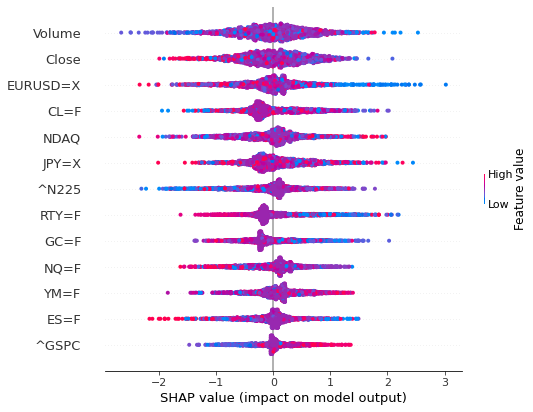

In [81]:
shap_values = shap.TreeExplainer(xgb).shap_values(X)
shap.summary_plot(shap_values, X, feature_names=full_dataset.columns.to_list()[:-1],show=False,max_display=22)

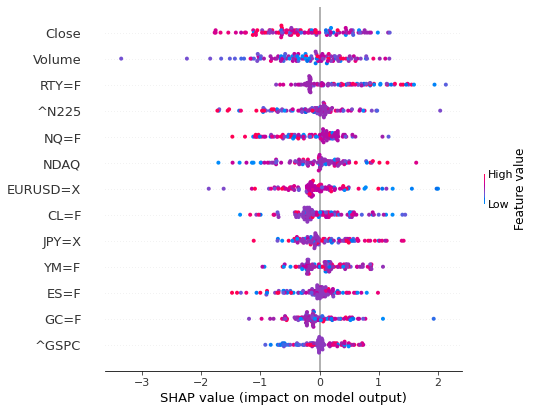

In [79]:
shap_values = shap.TreeExplainer(xgb).shap_values(X_test[y_test == y_pred])
shap.summary_plot(shap_values, X_test[y_test == y_pred], feature_names=full_dataset.columns.to_list()[:-1],show=False,max_display=22)

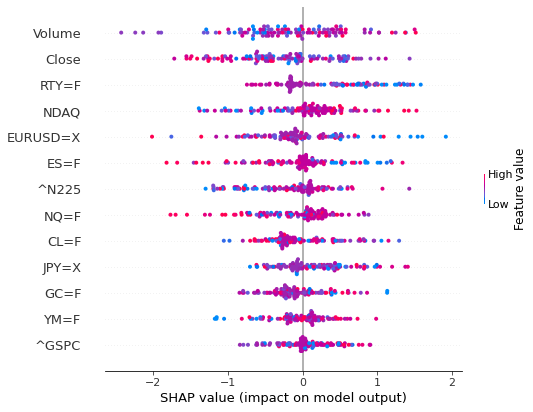

In [80]:
shap_values = shap.TreeExplainer(xgb).shap_values(X_test[y_test != y_pred])
shap.summary_plot(shap_values, X_test[y_test != y_pred], feature_names=full_dataset.columns.to_list()[:-1],show=False,max_display=22)